# Import

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import json

In [23]:
tries = 3 # How many simulations

# Time

In [24]:
step = list(range(1,1001))
beta = dict()
for t in step:
    beta[t] = round(t * 0.0199 / 999 + (0.02 - 0.0199 / 999 * 1000), 15) # beta = at + b
alpha = dict()
alpha[1] = 1 - beta[1]
for t in step[1:]:
    alpha[t] = alpha[t-1] * (1 - beta[t])


In [25]:
import math
T = dict()
T[0] = 0
for t in step:
    T[t] = -1/2 * math.log(alpha[t])

In [26]:
T[1] #collapse time experimental

5.000250016667366e-05

# Speciation


In [27]:
mnist = []
for x in range(tries):
# Load dictionary from the JSON file
    with open('spec_mnist_'+str(x)+'.json', 'r') as json_file:
        b = json.load(json_file)
    a = dict()
    for x in b:
        a[int(x)] = b[x]
    mnist.append(a)

fashion = []
for x in range(tries):
# Load dictionary from the JSON file
    with open('spec_fashion_'+str(x)+'.json', 'r') as json_file:
        b = json.load(json_file)
    a = dict()
    for x in b:
        a[int(x)] = b[x]
    fashion.append(a)

cifar = []
for x in range(tries):
# Load dictionary from the JSON file
    with open('spec_ciphar_'+str(x)+'.json', 'r') as json_file:
        b = json.load(json_file)
    a = dict()
    for x in b:
        a[int(x)] = b[x]
    cifar.append(a)


    

In [28]:
for i in range(len(mnist)):
    mnist[i] = np.array(list(mnist[i].values()))
    fashion[i] = np.array(list(fashion[i].values()))
    cifar[i] = np.array(list(cifar[i].values()))

## Normal time

In [29]:
ts_mnist = 495
ts_fashion = 584
ts_cifar = 526

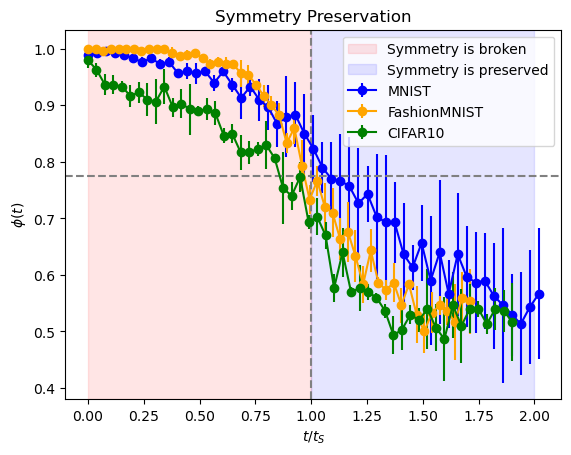

In [30]:

# Sample data
t = np.linspace(0, 1000,51)

phi_MNIST = sum([x for x in mnist]) / tries
phi_fashion = sum([x for x in fashion]) / tries
phi_cifar = sum([x for x in cifar]) / tries

# Compute the errors
err_mnist = []
err_fashion = []
err_cifar = []
for x in range(len(mnist[0])):
    err_mnist.append(np.std([mnist[i][x] for i in range(tries)]))
    err_fashion.append(np.std([fashion[i][x] for i in range(tries)]))
    err_cifar.append(np.std([cifar[i][x] for i in range(tries)]))


# Create the plot
fig, ax = plt.subplots()
# Plot the data
ax.errorbar(t/ts_mnist, phi_MNIST, yerr=err_mnist, label='MNIST', fmt='o-', color='blue')
ax.errorbar(t/ts_fashion, phi_fashion, yerr=err_fashion, label='FashionMNIST', fmt='o-', color='orange')
ax.errorbar(t/ts_cifar, phi_cifar, yerr=err_cifar, label='CIFAR10', fmt='o-', color='green')


# Add labels and title
ax.set_xlabel('$t/t_S$')
ax.set_ylabel('$\phi(t)$')
ax.set_title('Symmetry Preservation')

# Add horizontal and vertical lines
ax.axhline(y=0.775, color='gray', linestyle='--')
ax.axvline(x=1.0, color='gray', linestyle='--')

# Add shaded regions
ax.axvspan(0, 1, color='red', alpha=0.1, label='Symmetry is broken')
ax.axvspan(1, 2, color='blue', alpha=0.1, label='Symmetry is preserved')

# Add legend
ax.legend()

# Show the plot
plt.show()


## Mapped time

mnist: 1.25
fashion: 1.73
cifar: 1.40

In [10]:
ts_mnist = 1.25
ts_fashion = 1.73

In [11]:
t = np.array([T[x] for x in range(0,1001, 20)])

In [12]:
len(t), len(phi_fashion)

(51, 51)

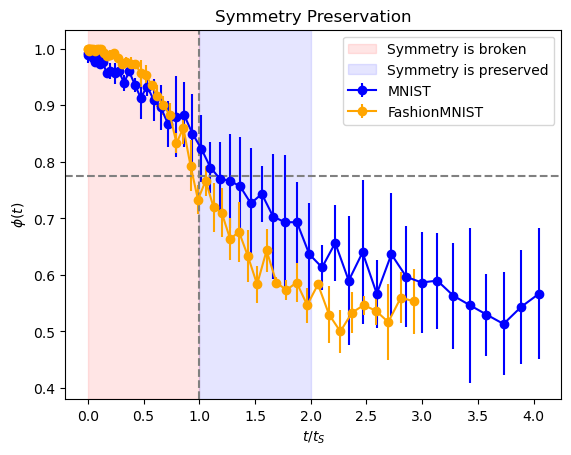

In [13]:

# Sample data
#t = np.linspace(0, 1000,51)
t = np.array([T[x] for x in range(0,1001, 20)])

phi_MNIST = sum([x for x in mnist]) / tries
phi_fashion = sum([x for x in fashion]) / tries

# Compute the errors
err_mnist = []
err_fashion = []
for x in range(len(mnist[0])):
    err_mnist.append(np.std([mnist[i][x] for i in range(tries)]))
    err_fashion.append(np.std([fashion[i][x] for i in range(tries)]))


# Create the plot
fig, ax = plt.subplots()
# Plot the data
ax.errorbar(t/ts_mnist, phi_MNIST, yerr=err_mnist, label='MNIST', fmt='o-', color='blue')
ax.errorbar(t/ts_fashion, phi_fashion, yerr=err_fashion, label='FashionMNIST', fmt='o-', color='orange')


# Add labels and title
ax.set_xlabel('$t/t_S$')
ax.set_ylabel('$\phi(t)$')
ax.set_title('Symmetry Preservation')

# Add horizontal and vertical lines
ax.axhline(y=0.775, color='gray', linestyle='--')
ax.axvline(x=1.0, color='gray', linestyle='--')

# Add shaded regions
ax.axvspan(0, 1, color='red', alpha=0.1, label='Symmetry is broken')
ax.axvspan(1, 2, color='blue', alpha=0.1, label='Symmetry is preserved')

# Add legend
ax.legend()

# Show the plot
plt.show()

# Collapse

MNIST: 0.27821403313331994

Fashion: 0.17263673425161286

CIFAR: 0.20899704035977237

In [31]:
tries = 3

In [39]:
import json

mnist = []
for x in range(tries):
# Load dictionary from the JSON file
    with open('col_mnist_'+str(x)+'.json', 'r') as json_file:
        b = json.load(json_file)
    a = dict()
    for x in b:
        a[int(x)] = b[x]
    mnist.append(a)


fashion = []
for x in range(tries):
# Load dictionary from the JSON file
    with open('col_fashion_'+str(x)+'.json', 'r') as json_file:
        b = json.load(json_file)
    a = dict()
    for x in b:
        a[int(x)] = b[x]
    fashion.append(a)


cifar = []
for x in range(tries):
# Load dictionary from the JSON file
    with open('col_cifar_'+str(x)+'.json', 'r') as json_file:
        b = json.load(json_file)
    a = dict()
    for x in b:
        a[int(x)] = b[x]
    cifar.append(a)
    

In [40]:
import numpy as np
for i in range(len(mnist)):
    mnist[i] = np.array(list(mnist[i].values()))
    fashion[i] = np.array(list(fashion[i].values()))
    cifar[i] = np.array(list(cifar[i].values()))

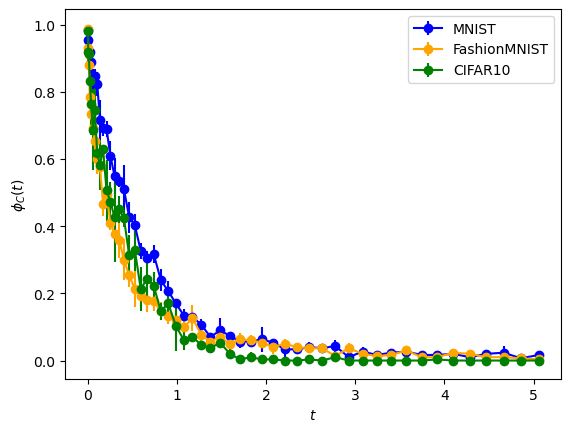

In [41]:
import matplotlib.pyplot as plt
# Sample data
#t = np.linspace(0, 1000,51)
t = np.array([T[x] for x in range(0,1001, 20)])

phi_MNIST = sum([x for x in mnist]) / tries
phi_fashion = sum([x for x in fashion]) / tries
phi_cifar = sum([x for x in cifar]) / tries

# Compute the errors
err_mnist = []
err_fashion = []
err_cifar = []
for x in range(len(mnist[0])):
    err_mnist.append(np.std([mnist[i][x] for i in range(tries)]))
    err_fashion.append(np.std([fashion[i][x] for i in range(tries)]))
    err_cifar.append(np.std([cifar[i][x] for i in range(tries)]))


# Create the plot
fig, ax = plt.subplots()
# Plot the data
ax.errorbar(t, phi_MNIST, yerr=err_mnist, label='MNIST', fmt='o-', color='blue')
ax.errorbar(t, phi_fashion, yerr=err_fashion, label='FashionMNIST', fmt='o-', color='orange')
ax.errorbar(t, phi_cifar, yerr=err_cifar, label='CIFAR10', fmt='o-', color='green')

# Add labels and title
ax.set_xlabel('$t$')
ax.set_ylabel('$\phi_C(t)$')




# Add legend
ax.legend()

# Show the plot
plt.show()